In [1]:
import warnings
import pandas as pd
data = pd.read_csv("Train.csv")
data

date_time is_holiday  air_pollution_index  humidity  \
0      2012-10-02 09:00:00        NaN                  121        89   
1      2012-10-02 10:00:00        NaN                  178        67   
2      2012-10-02 11:00:00        NaN                  113        66   
3      2012-10-02 12:00:00        NaN                   20        66   
4      2012-10-02 13:00:00        NaN                  281        65   
...                    ...        ...                  ...       ...   
33745  2017-05-17 21:00:00        NaN                   74        85   
33746  2017-05-17 22:00:00        NaN                   81        70   
33747  2017-05-17 22:00:00        NaN                  138        70   
33748  2017-05-17 23:00:00        NaN                  229        66   
33749  2017-05-17 23:00:00        NaN                  140        63   

       wind_speed  wind_direction  visibility_in_miles  dew_point  \
0               2             329                    1          1   
1               3             330                    1          1   
2               3             329                    2          2   
3               3             329                    5          5   
4               3             329                    7          7   
...           ...             ...                  ...        ...   
33745           1             328                    7          7   
33746           1              24                    2          2   
33747           1              24                    1          1   
33748           1              42                    6          6   
33749           1              27                    8          8   

       temperature  rain_p_h  snow_p_h  clouds_all weather_type  \
0           288.28       0.0       0.0          40       Clouds   
1           289.36       0.0       0.0          75       Clouds   
2           289.58       0.0       0.0          90       Clouds   
3           290.13       0.0       0.0          90       Clouds   
4           291.14       0.0       0.0          75       Clouds   
...            ...       ...       ...         ...          ...   
33745       287.88       0.0       0.0          90         Mist   
33746       286.95       0.0       0.0          90         Rain   
33747       286.95       0.0       0.0          90         Mist   
33748       285.75       0.0       0.0          90         Rain   
33749       285.75       0.0       0.0          90         Mist   

        weather_description  traffic_volume  
0          scattered clouds            5545  
1             broken clouds            4516  
2           overcast clouds            4767  
3           overcast clouds            5026  
4             broken clouds            4918  
...                     ...             ...  
33745                  mist            2348  
33746  heavy intensity rain            2194  
33747                  mist            2194  
33748  heavy intensity rain            1328  
33749                  mist            1328  

[33750 rows x 15 columns]

In [2]:
data.describe()

air_pollution_index      humidity    wind_speed  wind_direction  \
count         33750.000000  33750.000000  33750.000000    33750.000000   
mean            154.841422     71.209007      3.378193      199.471852   
std              83.735515     16.852248      2.055792       99.841088   
min              10.000000     13.000000      0.000000        0.000000   
25%              83.000000     60.000000      2.000000      130.000000   
50%             155.000000     72.000000      3.000000      200.000000   
75%             228.000000     85.000000      5.000000      290.000000   
max             299.000000    100.000000     16.000000      360.000000   

       visibility_in_miles     dew_point   temperature      rain_p_h  \
count         33750.000000  33750.000000  33750.000000  33750.000000   
mean              4.989748      4.989748    280.069587      0.448739   
std               2.570021      2.570021     13.415256     53.526500   
min               1.000000      1.000000      0.000000      0.000000   
25%               3.000000      3.000000    271.720000      0.000000   
50%               5.000000      5.000000    280.150000      0.000000   
75%               7.000000      7.000000    290.620000      0.000000   
max               9.000000      9.000000    308.240000   9831.300000   

           snow_p_h    clouds_all  traffic_volume  
count  33750.000000  33750.000000    33750.000000  
mean       0.000318     50.458785     3240.118163  
std        0.009760     38.871734     1991.487289  
min        0.000000      0.000000        0.000000  
25%        0.000000      1.000000     1165.250000  
50%        0.000000     64.000000     3335.000000  
75%        0.000000     90.000000     4926.000000  
max        0.510000    100.000000     7280.000000

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [4]:
data.isna().sum()

date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
#Sorting and Resetting Index
data = data.sort_values(by=['date_time'], ascending=True).reset_index(drop=True)

#Creating Lag Features
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)

#Handling Missing Values in the 'is_holiday' Column
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

#Extracting Date and Time Features
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))

#Saving the Cleaned Data
data.to_csv("filtered-1.csv", index=None)
data.to_csv()

',date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,last_1_hour_traffic,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year\r\n0,2012-10-02 09:00:00,1,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,,,,,,,9,2,2,10,2012\r\n1,2012-10-02 10:00:00,1,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,5545.0,,,,,,10,2,2,10,2012\r\n2,2012-10-02 11:00:00,1,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,4516.0,5545.0,,,,,11,2,2,10,2012\r\n3,2012-10-02 12:00:00,1,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,4767.0,4516.0,5545.0,,,,12,2,2,10,2012\r\n4,2012-10-02 13:00:00,1,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,5026.0,4767.0,4516.0,5545.0,,,13,2,2,10,2012\r\n5,2012-10-02 14:00:00,1,23,65,3,328,

In [7]:
#Sampling Data and Resetting Index
data = data.sample(10000).reset_index(drop=True)

#Labled and Numeric columns
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [8]:
features = numeric_columns+label_columns
X = data[features]
X.head()

is_holiday  temperature  weekday  hour  month_day  year  month  \
0           1       284.29        4    18         25  2012     10   
1           1       285.26        1     3         27  2013      5   
2           1       296.14        3     5         27  2016      7   
3           1       291.32        1    15          2  2013      9   
4           1       273.29        5    21          1  2016      4   

  weather_type weather_description  
0         Mist                mist  
1       Clouds     overcast clouds  
2         Rain          light rain  
3        Clear        Sky is Clear  
4        Clear        sky is clear

In [9]:
X.shape

(10000, 9)

In [10]:
from functools import reduce

# Function to get unique elements from a list
def unique(list1):
    ans = reduce(lambda re, x: re + [x] if x not in re else re, list1, [])
    print(ans)

# Extracting weather type and description from the data
n1 = data['weather_type']
n2 = data['weather_description']

# Printing unique weather types and descriptions
unique(n1)
unique(n2)

# Lists of known weather types and descriptions for encoding
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds',
              'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm',
              'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle',
              'shower snow', 'snow', 'thunderstorm with rain', 'thunderstorm with heavy rain', 'thunderstorm with light rain',
              'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain',
              'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain',
              'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']

"""# Data Preparation"""

# Initializing empty lists to store encoded weather types and descriptions
n11 = []
n22 = []

# Iterate through the dataset to encode the weather data
for i in range(len(data)):
    # Encoding weather type
    if n1[i] not in n1features:
        n11.append(0)  # Append 0 if the weather type is not in the list
    else:
        n11.append(n1features.index(n1[i]) + 1)  # Append the index + 1 of the weather type in the list
    
    # Encoding weather description
    if n2[i] not in n2features:
        n22.append(0)  # Append 0 if the weather description is not in the list
    else:
        n22.append(n2features.index(n2[i]) + 1)  # Append the index + 1 of the weather description in the list

# print(n11)
# print(n22)

# Updating the dataset with encoded weather type and description
data['weather_type'] = n11
data['weather_description'] = n22


['Mist', 'Clouds', 'Rain', 'Clear', 'Snow', 'Drizzle', 'Fog', 'Thunderstorm', 'Haze', 'Smoke', 'Squall']
['mist', 'overcast clouds', 'light rain', 'Sky is Clear', 'sky is clear', 'broken clouds', 'scattered clouds', 'moderate rain', 'heavy snow', 'drizzle', 'light snow', 'few clouds', 'fog', 'light intensity shower rain', 'light intensity drizzle', 'proximity thunderstorm', 'heavy intensity rain', 'haze', 'proximity thunderstorm with rain', 'snow', 'thunderstorm with light rain', 'shower drizzle', 'thunderstorm', 'thunderstorm with heavy rain', 'heavy intensity drizzle', 'proximity shower rain', 'proximity thunderstorm with drizzle', 'smoke', 'freezing rain', 'thunderstorm with rain', 'very heavy rain', 'SQUALLS', 'light rain and snow', 'sleet', 'light shower snow']


In [11]:
data.head()

date_time  is_holiday  air_pollution_index  humidity  wind_speed  \
0 2012-10-25 18:00:00           1                  127        59           6   
1 2013-05-27 03:00:00           1                  166        89           3   
2 2016-07-27 05:00:00           1                  108        87           2   
3 2013-09-02 15:00:00           1                   70        50           6   
4 2016-04-01 21:00:00           1                  173        34           6   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  ...  \
0             270                    8          8       284.29       0.0  ...   
1             162                    8          8       285.26       0.0  ...   
2             280                    3          3       296.14       0.0  ...   
3             202                    6          6       291.32       0.0  ...   
4             286                    6          6       273.29       0.0  ...   

   last_2_hour_traffic  last_3_hour_traffic  last_4_hour_traffic  \
0               6488.0               6488.0               6488.0   
1                514.0                863.0               1452.0   
2                498.0                341.0                380.0   
3               4134.0               4245.0               3201.0   
4               5129.0               6830.0               5889.0   

   last_5_hour_traffic  last_6_hour_traffic  hour  month_day  weekday  month  \
0               6473.0               6473.0    18         25        4     10   
1               1895.0               2242.0     3         27        1      5   
2                622.0               1078.0     5         27        3      7   
3               2605.0               2064.0    15          2        1      9   
4               5597.0               5439.0    21          1        5      4   

   year  
0  2012  
1  2013  
2  2016  
3  2013  
4  2016  

[5 rows x 26 columns]

In [12]:
#Heare i am creating data.csv for model in our app.py
#Defining the List of Columns
me = ['traffic_volume'] +  numeric_columns+label_columns

#Creating the CSV File
data[me].to_csv("data.csv")

In [13]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]
X.head()

is_holiday  temperature  weekday  hour  month_day  year  month  \
0           1       284.29        4    18         25  2012     10   
1           1       285.26        1     3         27  2013      5   
2           1       296.14        3     5         27  2016      7   
3           1       291.32        1    15          2  2013      9   
4           1       273.29        5    21          1  2016      4   

   weather_type  weather_description  
0             5                    6  
1             2                   10  
2             1                    1  
3             3                    3  
4             3                    5

In [14]:
y.head()

traffic_volume
0            5351
1             268
2            3061
3            4388
4            3085

In [15]:
#Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [16]:
X[:]

array([[0.        , 0.92503172, 0.5       , ..., 0.81818182, 0.4       ,
        0.17647059],
       [0.        , 0.92818794, 0.        , ..., 0.36363636, 0.1       ,
        0.29411765],
       [0.        , 0.96358963, 0.33333333, ..., 0.54545455, 0.        ,
        0.02941176],
       ...,
       [0.        , 0.86102886, 1.        , ..., 1.        , 0.3       ,
        0.58823529],
       [0.        , 0.84235187, 0.16666667, ..., 1.        , 0.1       ,
        0.05882353],
       [0.        , 0.96860053, 0.16666667, ..., 0.72727273, 0.2       ,
        0.14705882]])

In [17]:
#model checking with cleaned data set
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=\n',regr.predict(X[:5]))
print('Actual output :=\n',y[:5])

predicted output :=
 [0.65193851 0.08813781 0.45380681 0.7570824  0.40677007]
Actual output :=
 [0.73705234 0.0369146  0.42162534 0.60440771 0.42493113]


In [18]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))

Mean Absolute Error: 0.0743967306698504


In [19]:
data[features].head(5)

is_holiday  temperature  weekday  hour  month_day  year  month  \
0           1       284.29        4    18         25  2012     10   
1           1       285.26        1     3         27  2013      5   
2           1       296.14        3     5         27  2016      7   
3           1       291.32        1    15          2  2013      9   
4           1       273.29        5    21          1  2016      4   

   weather_type  weather_description  
0             5                    6  
1             2                   10  
2             1                    1  
3             3                    3  
4             3                    5

In [20]:

import seaborn as sns
# Setting the style for seaborn
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

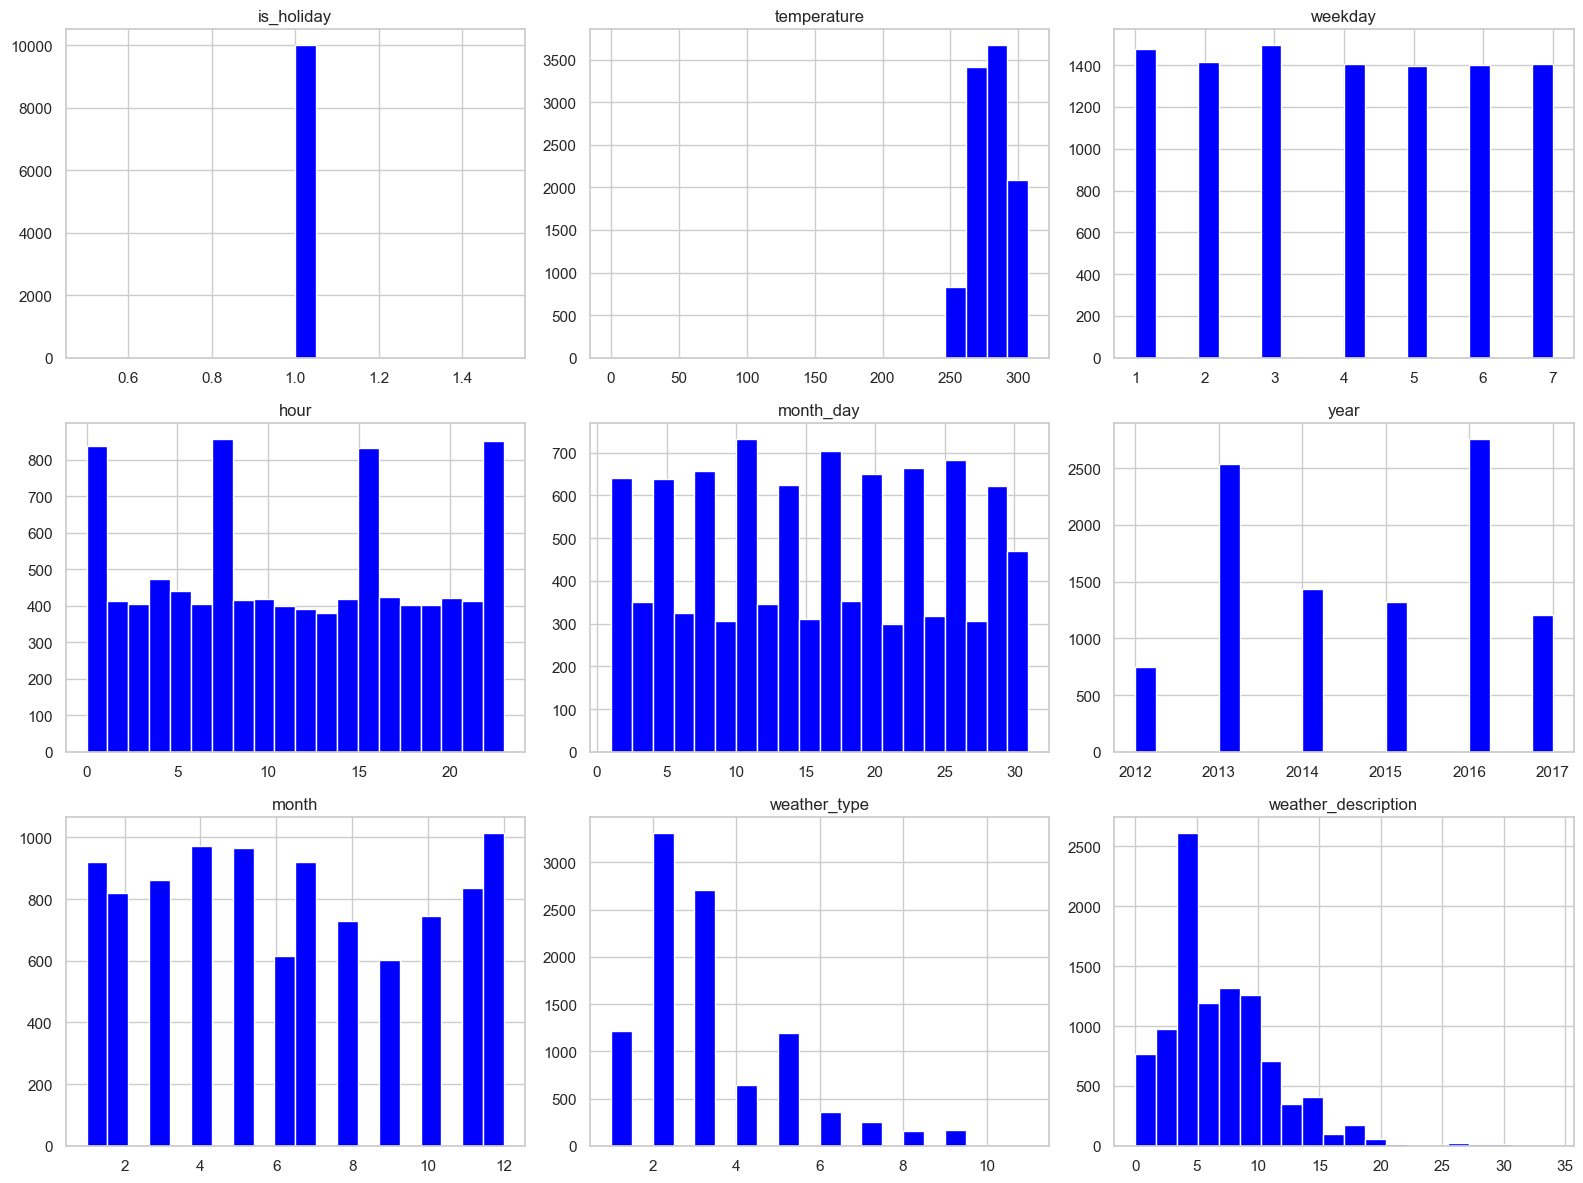

In [21]:
# Plot histograms
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[feature], bins=20, color='BLUE')
    plt.title(feature)
plt.tight_layout()
plt.show()

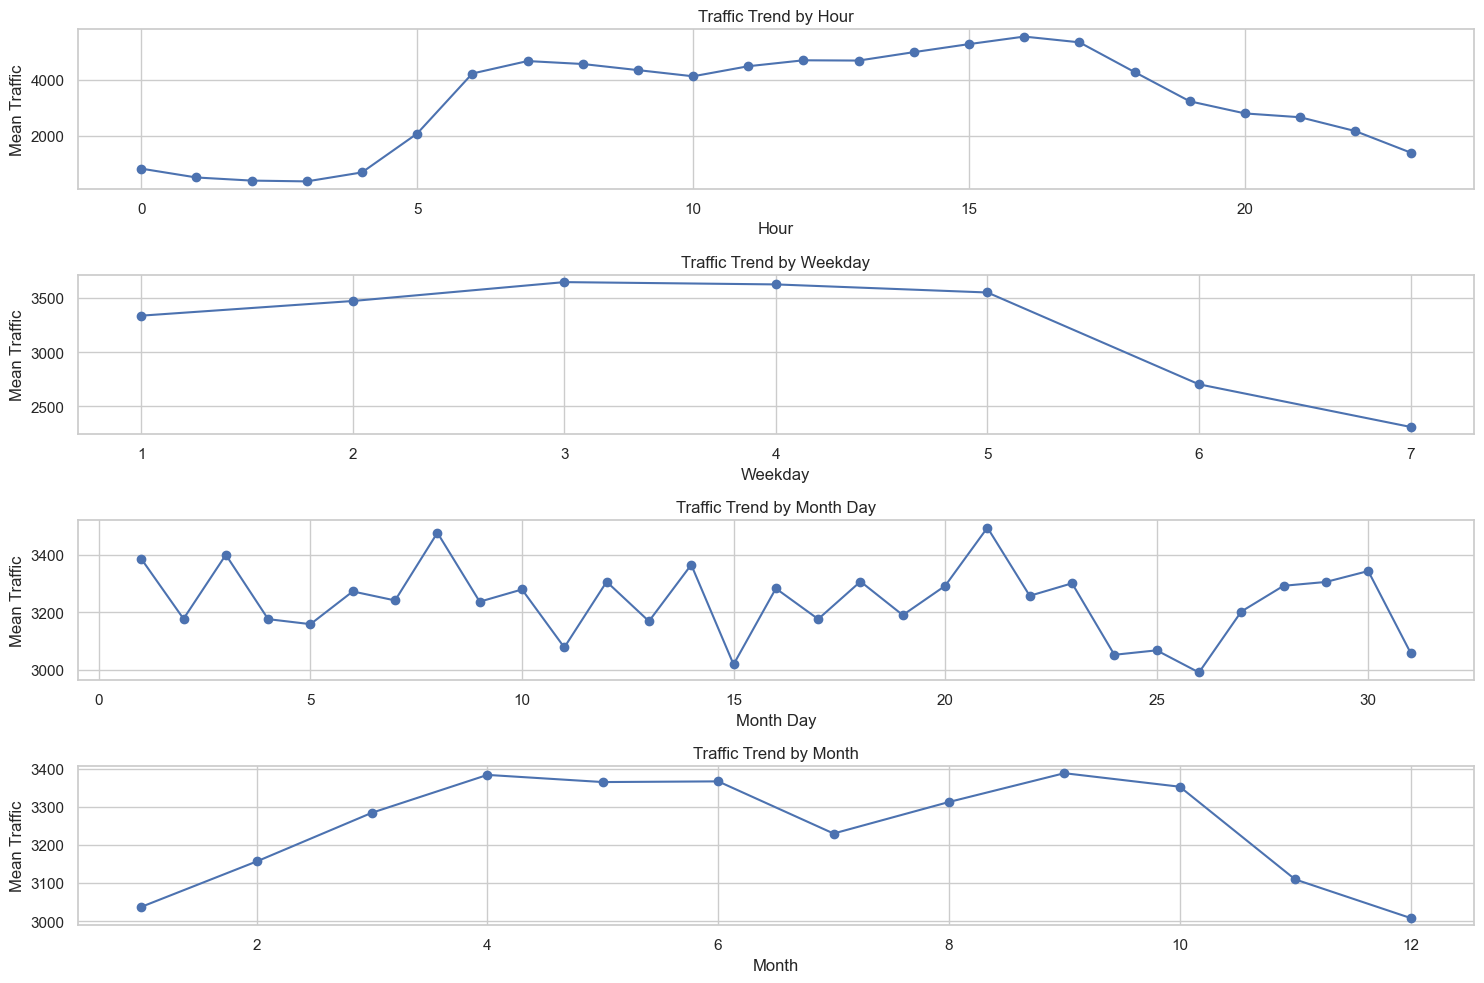

In [22]:
data_grouped = {
    'Hour': data.groupby('hour')['traffic_volume'].mean(),
    'Weekday': data.groupby('weekday')['traffic_volume'].mean(),
    'Month Day': data.groupby('month_day')['traffic_volume'].mean(),
    'Month': data.groupby('month')['traffic_volume'].mean()
}
fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=False)
for ax, (title, feature_data) in zip(axs, data_grouped.items()):
    ax.plot(feature_data.index, feature_data.values, marker='o')
    ax.set_title(f'Traffic Trend by {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Mean Traffic')
plt.tight_layout()
plt.show()

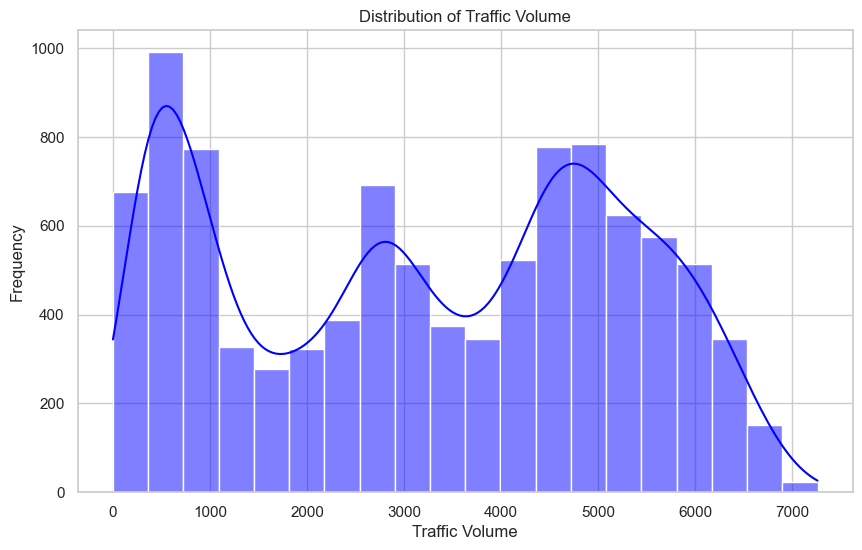

In [23]:
# Histogram: Distribution of traffic volume
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=20, kde=True,color='BLUE')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()


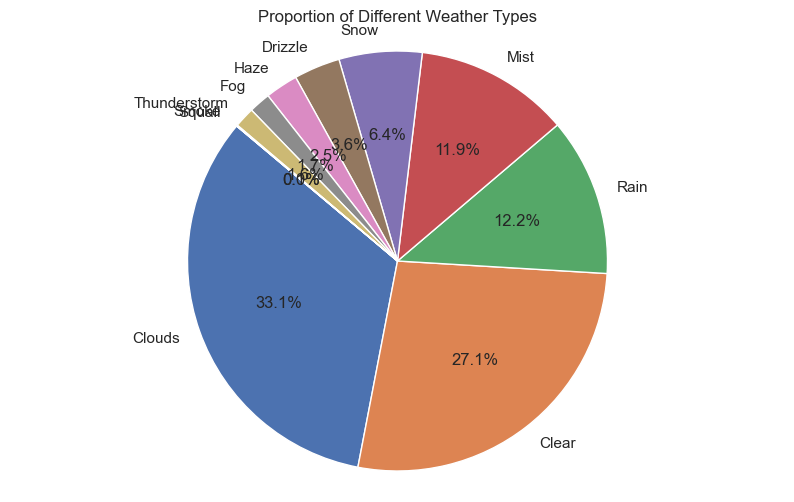

In [24]:
# Pie Chart: Proportion of different weather types
weather_counts = data['weather_type'].value_counts()
weather_labels = [n1features[i-1] if i != 0 else 'Unknown' for i in weather_counts.index]

plt.figure(figsize=(10, 6))
plt.pie(weather_counts, labels=weather_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Weather Types')
plt.axis('equal')
plt.show()

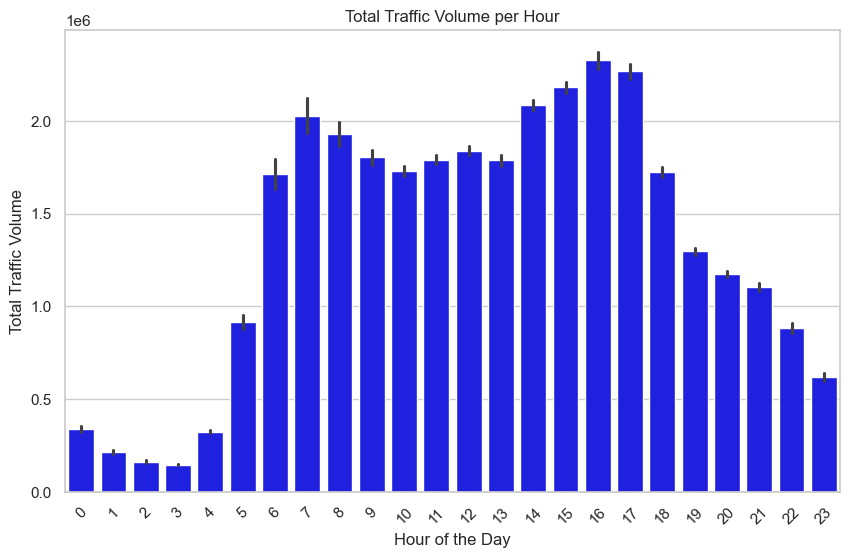

In [25]:
# Bar Plot: Distribution of traffic volume per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='traffic_volume', data=data, estimator=sum,color='BLUE')
plt.title('Total Traffic Volume per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()

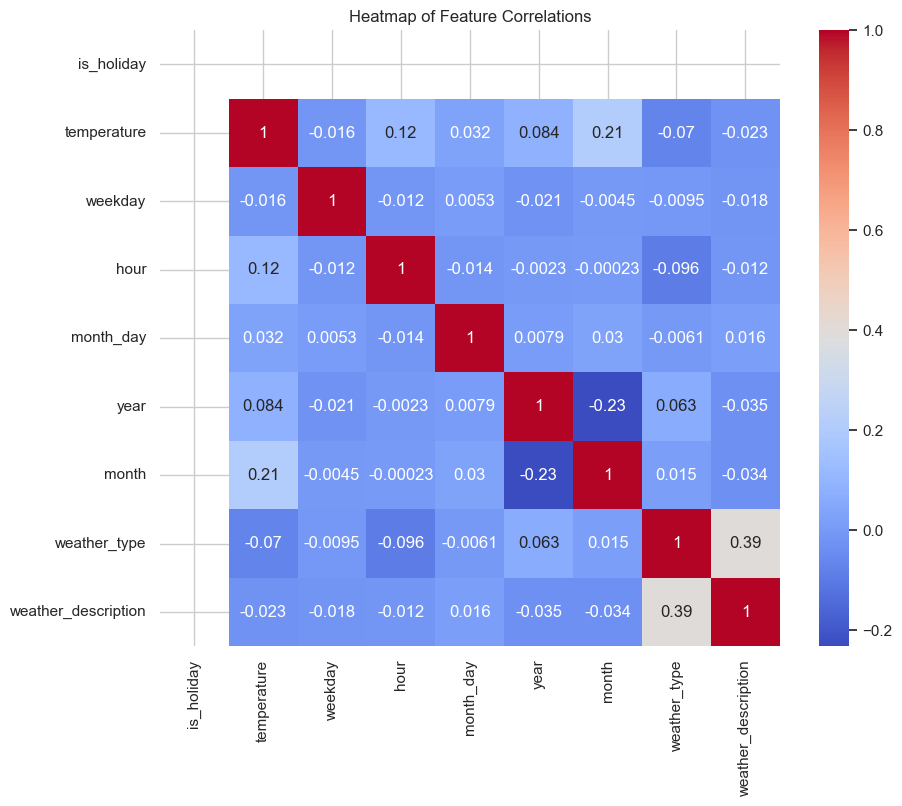

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[features].iloc[:, :10].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()